Saving archive (1).zip to archive (1).zip
Uploaded ZIP: archive (1).zip
Found CSV: /content/data/IMDB Dataset.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

📊 Logistic Regression Accuracy: 0.8854
📄 Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


📊 Naive Bayes Accuracy: 0.8489
📄 Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.85      0.85      5039

    a

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


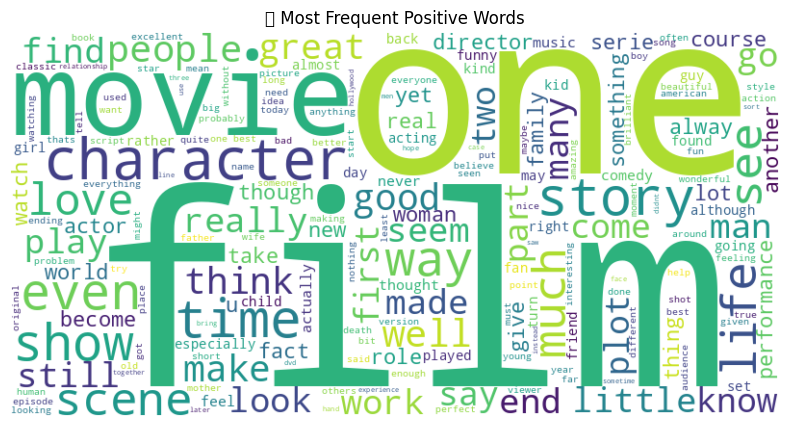

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


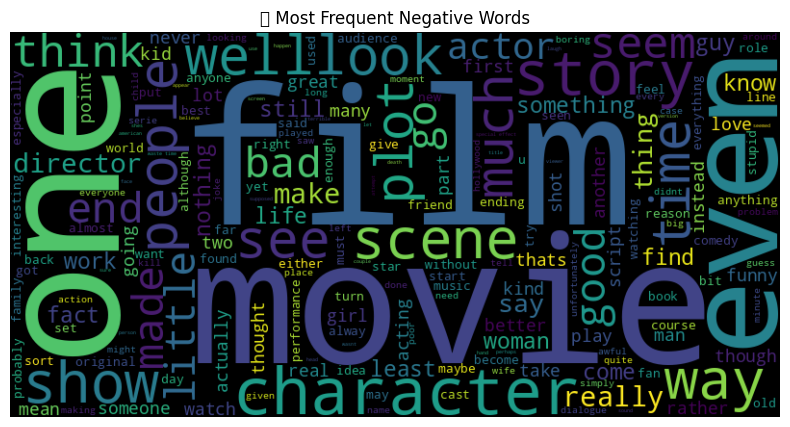

In [ ]:
# ✅ STEP 1: Upload the ZIP file manually
from google.colab import files
uploaded = files.upload()  # Upload your "archive(1).zip" or similar

# ✅ STEP 2: Find uploaded ZIP filename
import os, zipfile
uploaded_zip = next(iter(uploaded))  # Automatically gets the filename
print(f"Uploaded ZIP: {uploaded_zip}")

# ✅ STEP 3: Extract the ZIP
extract_path = "/content/data"
with zipfile.ZipFile(uploaded_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# ✅ STEP 4: Find the CSV file inside the ZIP
csv_path = None
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)

if not csv_path:
    raise FileNotFoundError("No CSV file found in extracted ZIP.")
print(f"Found CSV: {csv_path}")

# ✅ STEP 5: Install required libraries
!pip install nltk scikit-learn wordcloud --quiet

# ✅ STEP 6: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# ✅ STEP 7: Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added punkt_tab download

# ✅ STEP 8: Load dataset
df = pd.read_csv(csv_path)
print(df.head())

# ✅ STEP 9: Clean and preprocess reviews
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation/numbers
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

df['cleaned_review'] = df['review'].apply(clean_text)

# ✅ STEP 10: Encode sentiment (positive=1, negative=0)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# ✅ STEP 11: Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['label'], test_size=0.2, random_state=42)

# ✅ STEP 12: TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ✅ STEP 13: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

# ✅ STEP 14: Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

# ✅ STEP 15: Evaluation
print("\n📊 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("📄 Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))

print("\n📊 Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("📄 Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))

# ✅ STEP 16: Bonus – WordClouds
pos_text = " ".join(df[df['label'] == 1]['cleaned_review'])
neg_text = " ".join(df[df['label'] == 0]['cleaned_review'])

plt.figure(figsize=(10,5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("🌟 Most Frequent Positive Words")
plt.axis("off")
plt.show()

plt.figure(figsize=(10,5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("💢 Most Frequent Negative Words")
plt.axis("off")
plt.show()